<a href="https://colab.research.google.com/github/esraasayed98/Practice_DL/blob/main/3_CIFAR_10_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input


# Load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
test_labels.shape

(10000, 1)

In [7]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# one hot encoding to labels

In [8]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
train_labels.shape

(50000, 10)

In [10]:
test_labels.shape

(10000, 10)

# Reshape images

In [11]:
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

# split data

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True, stratify=train_labels)

# Data Generator

In [47]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
    x=x_train,
    y= y_train,
    batch_size=16
     )
validation_generator = test_datagen.flow(
        x= x_val,
        y= y_val,
        batch_size=16
        )

test_generator = test_datagen.flow(
        x= test_images,
        y= test_labels,
        batch_size=16
        )


# Baseline Model

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [49]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

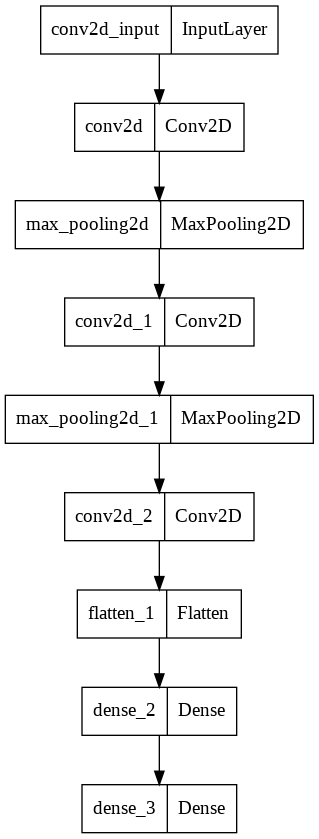

In [51]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [52]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [53]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (16, 32, 32, 3)
labels batch shape: (16, 10)


In [54]:
# train model
history = model.fit_generator(
      train_generator,
      epochs=50,
      validation_data=validation_generator,
      )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
2500/2500 [==============================] - 14s 5ms/step - loss: 1.7651 - accuracy: 0.3548 - val_loss: 1.5422 - val_accuracy: 0.4396
Epoch 2/50
2500/2500 [==============================] - 13s 5ms/step - loss: 1.4590 - accuracy: 0.4751 - val_loss: 1.3922 - val_accuracy: 0.4963
Epoch 3/50
2500/2500 [==============================] - 13s 5ms/step - loss: 1.3550 - accuracy: 0.5177 - val_loss: 1.3254 - val_accuracy: 0.5350
Epoch 4/50
2500/2500 [==============================] - 13s 5ms/step - loss: 1.2803 - accuracy: 0.5460 - val_loss: 1.2587 - val_accuracy: 0.5587
Epoch 5/50
2500/2500 [==============================] - 13s 5ms/step - loss: 1.2229 - accuracy: 0.5691 - val_loss: 1.2037 - val_accuracy: 0.5797
Epoch 6/50
2500/2500 [==============================] - 13s 5ms/step - loss: 1.1696 - accuracy: 0.5897 - val_loss: 1.1676 - val_accuracy: 0.5931
Epoch 7/50
2500/2500 [==============================] - 13s 5ms/step - loss: 1.1288 - accuracy: 0.6042 - val_loss: 1.1509 - val_ac

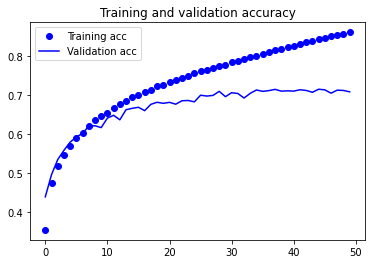

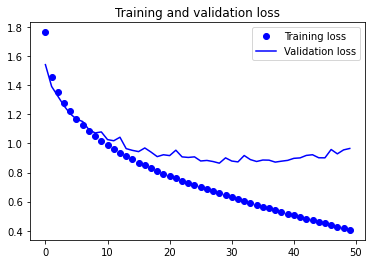

In [55]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))
# plot train acc vs validation acc

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
# plot train loss vs validation loss

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
test_generator = test_datagen.flow(
        x= test_images,
        y= test_labels,
        batch_size=16
        )

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.7099999785423279


## CNN Visualization

In [58]:
image=test_images[0]
image_resize=cv2.resize(image,(32,32))
img=np.array(image_resize).reshape(1,32,32,3)

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [66]:
# Extracts the outputs of the top 7 layers:
layer_outputs = [layer.output for layer in model.layers[:5]]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [67]:
activation_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3692

In [68]:
activations = activation_model.predict(img)
print(len(activations))

5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


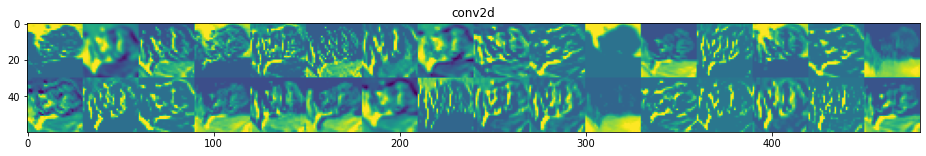

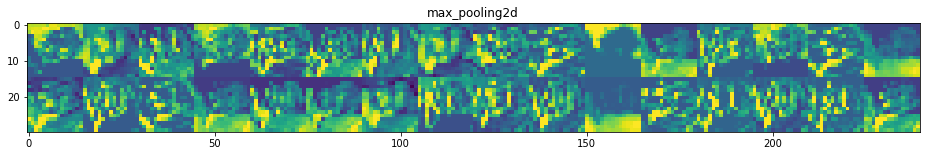

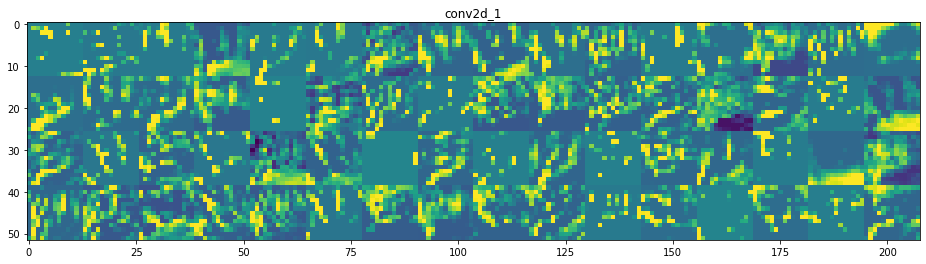

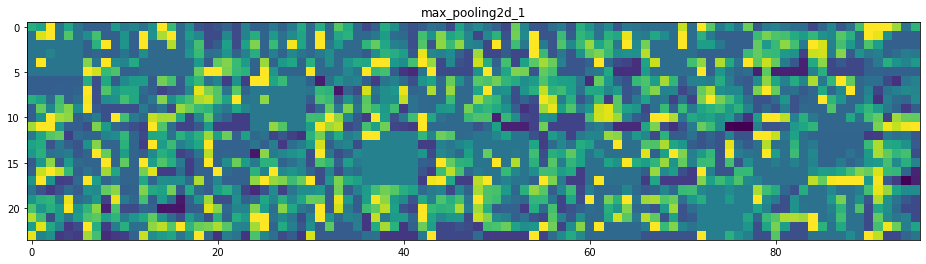

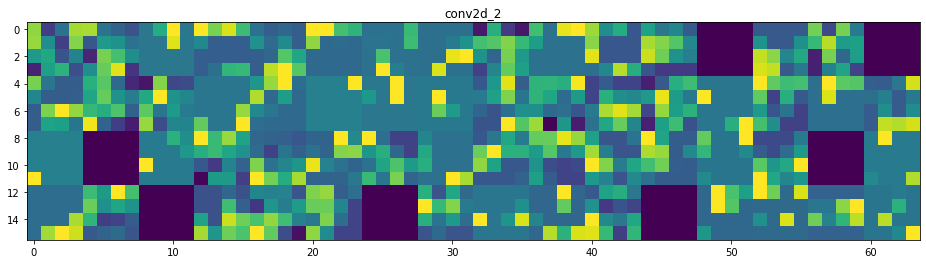

In [70]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

# With Data augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
    x=x_train,
    y= y_train,
    batch_size=16
     )
validation_generator = test_datagen.flow(
        x= x_val,
        y= y_val,
        batch_size=16
        )

test_generator = test_datagen.flow(
        x= test_images,
        y= test_labels,
        batch_size=16
        )


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2500,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=625)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


2500/2500 [==============================] - 31s 12ms/step - loss: 1.9553 - accuracy: 0.2761 - val_loss: 1.7391 - val_accuracy: 0.3712
Epoch 2/50
2500/2500 [==============================] - 30s 12ms/step - loss: 1.7741 - accuracy: 0.3453 - val_loss: 1.6060 - val_accuracy: 0.4272
Epoch 3/50
2500/2500 [==============================] - 30s 12ms/step - loss: 1.6941 - accuracy: 0.3779 - val_loss: 1.4546 - val_accuracy: 0.4771
Epoch 4/50
2500/2500 [==============================] - 30s 12ms/step - loss: 1.6473 - accuracy: 0.3992 - val_loss: 1.4758 - val_accuracy: 0.4600
Epoch 5/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.6042 - accuracy: 0.4210 - val_loss: 1.4787 - val_accuracy: 0.4645
Epoch 6/50
2500/2500 [==============================] - 30s 12ms/step - loss: 1.5707 - accuracy: 0.4336 - val_loss: 1.3796 - val_accuracy: 0.5098
Epoch 7/50
2500/2500 [==============================] - 30s 12ms/step - loss: 1.5441 - accuracy: 0.4431 - val_loss: 1.3783 - val_accura

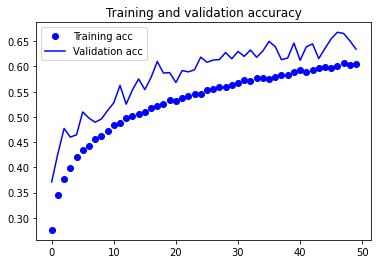

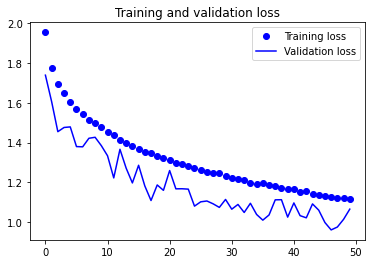

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))
# plot train acc vs validation acc

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
# plot train loss vs validation loss

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow(
        x= test_images,
        y= test_labels,
        batch_size=16
        )

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


test acc: 0.65625


# Data augmentation and Dropout

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# train model
history = model2.fit_generator(
      train_generator,
      steps_per_epoch=2500,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=625)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


2500/2500 [==============================] - 35s 14ms/step - loss: 2.1005 - accuracy: 0.2326 - val_loss: 1.8571 - val_accuracy: 0.3403
Epoch 2/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.8807 - accuracy: 0.3206 - val_loss: 1.8016 - val_accuracy: 0.3589
Epoch 3/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.8015 - accuracy: 0.3530 - val_loss: 1.6016 - val_accuracy: 0.4281
Epoch 4/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.7479 - accuracy: 0.3738 - val_loss: 1.5758 - val_accuracy: 0.4509
Epoch 5/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.7030 - accuracy: 0.3928 - val_loss: 1.4681 - val_accuracy: 0.4822
Epoch 6/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.6744 - accuracy: 0.4043 - val_loss: 1.4456 - val_accuracy: 0.4945
Epoch 7/50
2500/2500 [==============================] - 31s 12ms/step - loss: 1.6446 - accuracy: 0.4157 - val_loss: 1.4165 - val_accura

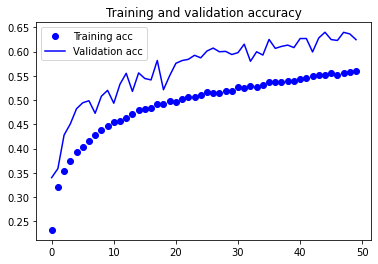

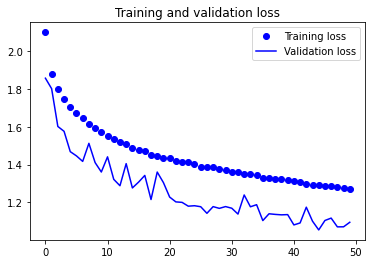

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))

# plot train acc vs validation acc
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
# plot train loss vs validation loss

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# test 
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


test acc: 0.6162499785423279


----

# Transfer Learning

##  Feature Extraction with data augmentation (Online)

VGG16

In [13]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [14]:
vgg_model = models.Sequential()
vgg_model.add(conv_base)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(256, activation='relu'))
vgg_model.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
vgg_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [15]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [16]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(vgg_model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [17]:
conv_base.trainable = False

In [18]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(vgg_model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [19]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

train_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=preprocess_input,
      rotation_range=40, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255) # Issue: https://github.com/fchollet/deep-learning-with-python-notebooks/issues/21

train_generator = train_datagen.flow(
    x=x_train,
    y= y_train,
    batch_size=16
     )
validation_generator = test_datagen.flow(
        x= x_val,
        y= y_val,
        batch_size=16
        )

test_generator = test_datagen.flow(
        x= test_images,
        y= test_labels,
        batch_size=16
        )



In [21]:
from tensorflow.keras import callbacks
callbacks_ = [callbacks.EarlyStopping(monitor='val_loss', mode='min',patience=3)]


In [24]:
# train model
history = vgg_model.fit(train_generator,
                          validation_data=validation_generator,
                          epochs=50,
                          )

Epoch 1/50
2500/2500 [==============================] - 65s 26ms/step - loss: 0.5105 - accuracy: 0.8299 - val_loss: 0.4608 - val_accuracy: 0.8506
Epoch 2/50
2500/2500 [==============================] - 64s 26ms/step - loss: 0.4933 - accuracy: 0.8329 - val_loss: 0.4402 - val_accuracy: 0.8575
Epoch 3/50
2500/2500 [==============================] - 64s 26ms/step - loss: 0.4724 - accuracy: 0.8410 - val_loss: 0.4679 - val_accuracy: 0.8480
Epoch 4/50
2500/2500 [==============================] - 64s 26ms/step - loss: 0.4550 - accuracy: 0.8455 - val_loss: 0.4459 - val_accuracy: 0.8553
Epoch 5/50
2500/2500 [==============================] - 65s 26ms/step - loss: 0.4551 - accuracy: 0.8479 - val_loss: 0.4313 - val_accuracy: 0.8615
Epoch 6/50
2500/2500 [==============================] - 65s 26ms/step - loss: 0.4241 - accuracy: 0.8561 - val_loss: 0.4516 - val_accuracy: 0.8571
Epoch 7/50
2500/2500 [==============================] - 65s 26ms/step - loss: 0.4172 - accuracy: 0.8591 - val_loss: 0.4605 -

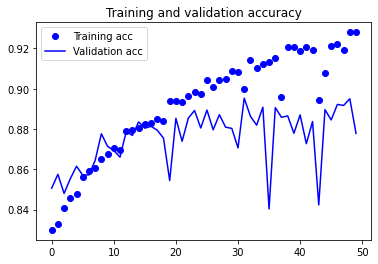

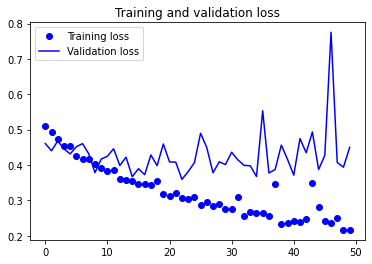

In [25]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))

# plot train acc vs validation acc
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
# plot train loss vs validation loss

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
test_loss, test_acc = vgg_model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


test acc: 0.8812500238418579


----------------

## ResNet

In [ ]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   weights='imagenet')


94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model = models.Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(256, activation='relu'))
resnet_model.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
resnet_model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24,114,826
Trainable params: 24,061,706
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
pretrained_model.trainable = False

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24,114,826
Trainable params: 527,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

train_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=preprocess_input,
      rotation_range=40, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255) # Issue: https://github.com/fchollet/deep-learning-with-python-notebooks/issues/21

train_generator = train_datagen.flow(
    x=x_train,
    y= y_train,
    batch_size=16
     )
validation_generator = test_datagen.flow(
        x= x_val,
        y= y_val,
        batch_size=16
        )

test_generator = test_datagen.flow(
        x= test_images,
        y= test_labels,
        batch_size=16
        )



In [ ]:
# train model
history = resnet_model.fit_generator(
      train_generator,
      steps_per_epoch=2500,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=625)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


2500/2500 [==============================] - 122s 47ms/step - loss: 1.6621 - accuracy: 0.4209 - val_loss: 1.1553 - val_accuracy: 0.6038
Epoch 2/50
2500/2500 [==============================] - 111s 44ms/step - loss: 1.2818 - accuracy: 0.5548 - val_loss: 1.0240 - val_accuracy: 0.6602
Epoch 3/50
2500/2500 [==============================] - 109s 44ms/step - loss: 1.1597 - accuracy: 0.6029 - val_loss: 0.9113 - val_accuracy: 0.6970
Epoch 4/50
2500/2500 [==============================] - 111s 44ms/step - loss: 1.0759 - accuracy: 0.6314 - val_loss: 0.9059 - val_accuracy: 0.6883
Epoch 5/50
2500/2500 [==============================] - 110s 44ms/step - loss: 1.0165 - accuracy: 0.6511 - val_loss: 0.9050 - val_accuracy: 0.7023
Epoch 6/50
2500/2500 [==============================] - 110s 44ms/step - loss: 0.9733 - accuracy: 0.6672 - val_loss: 0.7625 - val_accuracy: 0.7469
Epoch 7/50
2500/2500 [==============================] - 110s 44ms/step - loss: 0.9348 - accuracy: 0.6831 - val_loss: 0.7490 - val

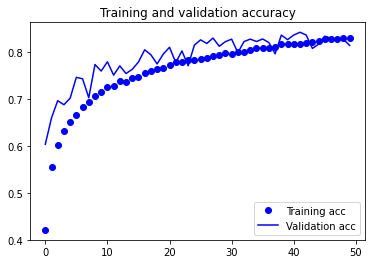

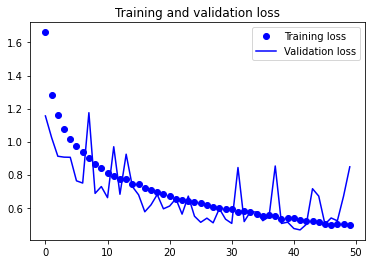

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))

# plot train acc vs validation acc
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
# plot train loss vs validation loss

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = resnet_model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


test acc: 0.7837499976158142


----------------

## Fine Tuning

### VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base_2 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [ ]:
conv_base_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
conv_base_2.trainable = True

set_trainable = False
for layer in conv_base_2.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
vgg_model_2 = models.Sequential()
vgg_model_2.add(conv_base_2)
vgg_model_2.add(layers.Flatten())
vgg_model_2.add(layers.Dense(256, activation='relu'))
vgg_model_2.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
vgg_model_2.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [ ]:
vgg_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=preprocess_input,
      rotation_range=40, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255) # Issue: https://github.com/fchollet/deep-learning-with-python-notebooks/issues/21

train_generator = train_datagen.flow(
    x=x_train,
    y= y_train,
    batch_size=16
     )
validation_generator = test_datagen.flow(
        x= x_val,
        y= y_val,
        batch_size=16
        )

test_generator = test_datagen.flow(
        x= test_images,
        y= test_labels,
        batch_size=16
        )

In [ ]:
# train model
history = vgg_model_2.fit_generator(
      train_generator,
      steps_per_epoch=2500,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=625)

Epoch 1/50
   1/2500 [..............................] - ETA: 3:06 - loss: 1.9520 - accuracy: 0.3125

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


2500/2500 [==============================] - 48s 19ms/step - loss: 1.3437 - accuracy: 0.5142 - val_loss: 0.9887 - val_accuracy: 0.6586
Epoch 2/50
2500/2500 [==============================] - 45s 18ms/step - loss: 1.0580 - accuracy: 0.6379 - val_loss: 0.8903 - val_accuracy: 0.6912
Epoch 3/50
2500/2500 [==============================] - 45s 18ms/step - loss: 0.9797 - accuracy: 0.6633 - val_loss: 0.8663 - val_accuracy: 0.6972
Epoch 4/50
2500/2500 [==============================] - 45s 18ms/step - loss: 0.9218 - accuracy: 0.6829 - val_loss: 0.8425 - val_accuracy: 0.7205
Epoch 5/50
2500/2500 [==============================] - 44s 18ms/step - loss: 0.8876 - accuracy: 0.6916 - val_loss: 0.7636 - val_accuracy: 0.7375
Epoch 6/50
2500/2500 [==============================] - 44s 18ms/step - loss: 0.8631 - accuracy: 0.7014 - val_loss: 0.7673 - val_accuracy: 0.7459
Epoch 7/50
2500/2500 [==============================] - 45s 18ms/step - loss: 0.8417 - accuracy: 0.7113 - val_loss: 0.7386 - val_accura

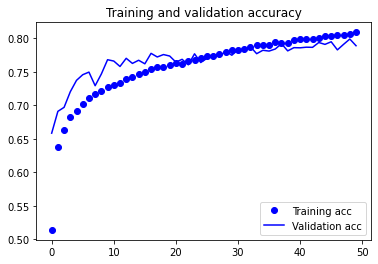

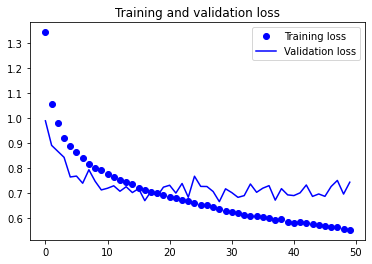

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))
# plot train acc vs validation acc

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
# plot train loss vs validation loss

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = vgg_model_2.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


test acc: 0.7862499952316284


### ResNet

In [ ]:
pretrained_model_2= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   weights='imagenet')
pretrained_model_2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
resnet_model_2 = models.Sequential()
resnet_model_2.add(pretrained_model_2)
resnet_model_2.add(layers.Flatten())
resnet_model_2.add(layers.Dense(256, activation='relu'))
resnet_model_2.add(layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
resnet_model_2.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [ ]:
pretrained_model_2.trainable = True

set_trainable = False
for layer in pretrained_model_2.layers:
    if layer.name == 'conv5_block1_1_conv':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
resnet_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24,114,826
Trainable params: 15,503,114
Non-trainable params: 8,611,712
_________________________________________________________________


In [ ]:
# train model
history = resnet_model_2.fit_generator(
      train_generator,
      steps_per_epoch=2500,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=625)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


2500/2500 [==============================] - 112s 45ms/step - loss: 1.5277 - accuracy: 0.4652 - val_loss: 1.0761 - val_accuracy: 0.6330
Epoch 2/50
2500/2500 [==============================] - 111s 44ms/step - loss: 1.2462 - accuracy: 0.5695 - val_loss: 0.9699 - val_accuracy: 0.6687
Epoch 3/50
2500/2500 [==============================] - 112s 45ms/step - loss: 1.1661 - accuracy: 0.6010 - val_loss: 0.8939 - val_accuracy: 0.6970
Epoch 4/50
2500/2500 [==============================] - 112s 45ms/step - loss: 1.1031 - accuracy: 0.6223 - val_loss: 0.8075 - val_accuracy: 0.7257
Epoch 5/50
2500/2500 [==============================] - 110s 44ms/step - loss: 1.0669 - accuracy: 0.6363 - val_loss: 1.0778 - val_accuracy: 0.6593
Epoch 6/50
2500/2500 [==============================] - 110s 44ms/step - loss: 1.0033 - accuracy: 0.6600 - val_loss: 0.8482 - val_accuracy: 0.7109
Epoch 7/50
2500/2500 [==============================] - 112s 45ms/step - loss: 0.9775 - accuracy: 0.6661 - val_loss: 0.7849 - val

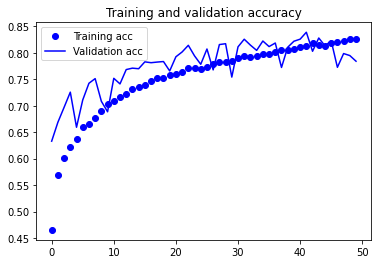

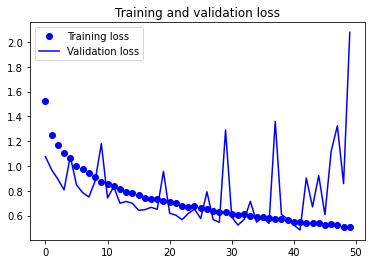

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_acc))
# plot train acc vs validation acc

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
# plot train loss vs validation loss

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = resnet_model_2.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


test acc: 0.7699999809265137
